In [1]:
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv("../summary_data/original/all_tools_TRB_diversity_with_singleton.csv")
df

,Sample,shannon_index_tool,clonotype_count_tool,tool,shannon_index_TCR,clonotype_count_TCR,repertoire_type,tissue,tissue_type,SDI_absolute_error,class,clonality_TCR,clonality_tool,clonality_absolute_error
0,SRR5233637,4.066967,76,MIXCR,7.716995,29648,high_SDI,small_intestine,T_cell_poor,3.650028,T_cell_poor_high_SDI,0.250570,0.060906,0.189664
1,SRR5233637,4.562193,115,IMREP,7.716995,29648,high_SDI,small_intestine,T_cell_poor,3.154802,T_cell_poor_high_SDI,0.250570,0.038512,0.212057
2,SRR5233637,4.593201,174,TRUST4,7.716995,29648,high_SDI,small_intestine,T_cell_poor,3.123794,T_cell_poor_high_SDI,0.250570,0.109682,0.140888
3,SRR5233637,1.704637,400,CATT,7.716995,29648,high_SDI,small_intestine,T_cell_poor,6.012358,T_cell_poor_high_SDI,0.250570,0.715489,0.464919
4,SRR5233639,6.924145,1546,MIXCR,10.148172,252376,high_SDI,lymph_node,T_cell_rich,3.224027,T_cell_rich_high_SDI,0.184144,0.057096,0.127048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,TCGA-CZ-5463,2.932332,57,TRUST4,5.214240,748,high_SDI,kidney,T_cell_poor,2.281907,T_cell_poor_high_SDI,0.212041,0.274723,0.062681
69,TCGA-CZ-5463,1.596365,59,CATT,5.214240,748,high_SDI,kidney,T_cell_poor,3.617874,T_cell_poor_high_SDI,0.212041,0.608498,0.396456
70,TCGA-CZ-5985,0.462037,2,IMREP,6.931272,5959,high_SDI,kidney,T_cell_poor,6.469235,T_cell_poor_high_SDI,0.202629,0.333422,0.130792
71,TCGA-CZ-5985,3.008997,85,TRUST4,6.931272,5959,high_SDI,kidney,T_cell_poor,3.922274,T_cell_poor_high_SDI,0.202629,0.322702,0.120073


In [3]:
T_cell_rich = df.loc[(df['tissue_type'] == 'T_cell_rich')]

In [4]:
mean_SDI_absolute_error = T_cell_rich["SDI_absolute_error"].mean()
print("Mean_SDI")
display(mean_SDI_absolute_error)

mean_SDI_absolute_error_std = T_cell_rich["SDI_absolute_error"].std()
print("STD_SDI")
display(mean_SDI_absolute_error_std)

mean_clonality_absolute_error = T_cell_rich["clonality_absolute_error"].mean()
print("Mean_clonality")
display(mean_clonality_absolute_error)

mean_clonality_absolute_error_std = T_cell_rich["clonality_absolute_error"].std()
print("STD_clonality")
display(mean_clonality_absolute_error_std)

mean_absolute_error_tool = T_cell_rich.groupby("tool")["SDI_absolute_error","clonality_absolute_error"].agg(["mean", "std"])
display(mean_absolute_error_tool)

Mean_SDI


2.6659350372640387

STD_SDI


2.5343814591522533

Mean_clonality


0.07919638562152305

STD_clonality


0.10095893292805995

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


SDI_absolute_error           clonality_absolute_error          
                     mean       std                     mean       std
tool                                                                  
CATT             3.087438  3.124735                 0.157197  0.174859
IMREP            2.499487  2.750986                 0.060629  0.050645
MIXCR            2.736662  2.422964                 0.052698  0.050284
TRUST4           2.340153  2.442080                 0.046263  0.036861

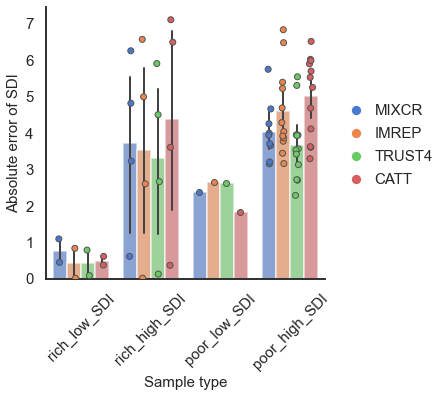

In [5]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x='class',y='SDI_absolute_error',data=df,palette="muted",hue='tool',alpha=0.7,errwidth=2,
                order=['T_cell_rich_low_SDI','T_cell_rich_high_SDI','T_cell_poor_low_SDI','T_cell_poor_high_SDI'])
sns.stripplot(x="class",y="SDI_absolute_error",data=df,s=6,color=".3",palette="muted",hue='tool',dodge=True,
              linewidth=1,order=['T_cell_rich_low_SDI','T_cell_rich_high_SDI','T_cell_poor_low_SDI','T_cell_poor_high_SDI'])
ax.set(xticklabels=["rich_low_SDI", "rich_high_SDI", "poor_low_SDI", "poor_high_SDI"])

ax.set_xlabel('Sample type',fontsize=15)
ax.set_ylabel('Absolute error of SDI',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1, 0.7), handletextpad=0.1, frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()

plt.savefig("../figures/supplementary/figureS6a.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS6a.png",bbox_inches="tight")

plt.show()

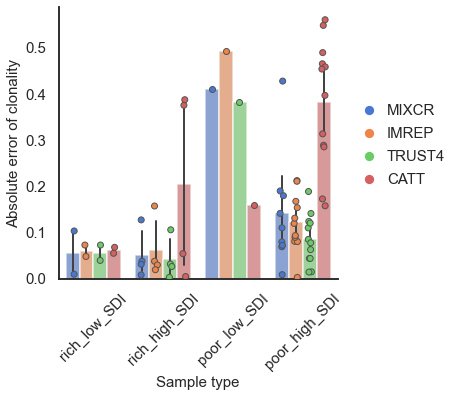

In [6]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x='class',y='clonality_absolute_error',data=df,palette="muted",hue='tool',alpha=0.7,errwidth=2,
                order=['T_cell_rich_low_SDI','T_cell_rich_high_SDI','T_cell_poor_low_SDI','T_cell_poor_high_SDI'])
sns.stripplot(x="class",y="clonality_absolute_error",data=df,s=6,color=".3",palette="muted",hue='tool',dodge=True,
              linewidth=1,order=['T_cell_rich_low_SDI','T_cell_rich_high_SDI','T_cell_poor_low_SDI','T_cell_poor_high_SDI'])
ax.set(xticklabels=["rich_low_SDI", "rich_high_SDI", "poor_low_SDI", "poor_high_SDI"])

ax.set_xlabel('Sample type',fontsize=15)
ax.set_ylabel('Absolute error of clonality',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1, 0.7), handletextpad=0.1, frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()

plt.savefig("../figures/supplementary/figureS6b.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS6b.png",bbox_inches="tight")

plt.show()

In [7]:
mean_class_absolute_error = df.groupby("class")["SDI_absolute_error","clonality_absolute_error"].agg(["mean", "std"])
display(mean_class_absolute_error)
tools = ['MIXCR','IMREP','TRUST4','CATT']              
for tool in tools:  
    print(tool)
    df_tool = df.loc[df['tool'] == tool]
    mean_class_absolute_error = df_tool.groupby("class")["SDI_absolute_error","clonality_absolute_error"].agg(["mean", "std"]) 
    display(mean_class_absolute_error)

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


SDI_absolute_error           clonality_absolute_error  \
                                   mean       std                     mean   
class                                                                        
T_cell_poor_high_SDI           4.340520  1.134733                 0.186971   
T_cell_poor_low_SDI            2.370655  0.374395                 0.360734   
T_cell_rich_high_SDI           3.735244  2.474834                 0.089588   
T_cell_rich_low_SDI            0.527317  0.373162                 0.058414   

                                
                           std  
class                           
T_cell_poor_high_SDI  0.155576  
T_cell_poor_low_SDI   0.142335  
T_cell_rich_high_SDI  0.122167  
T_cell_rich_low_SDI   0.027715

MIXCR


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


SDI_absolute_error           clonality_absolute_error  \
                                   mean       std                     mean   
class                                                                        
T_cell_poor_high_SDI           4.027958  0.797756                 0.141834   
T_cell_poor_low_SDI            2.383891       NaN                 0.409424   
T_cell_rich_high_SDI           3.721666  2.415505                 0.050901   
T_cell_rich_low_SDI            0.766653  0.454954                 0.056292   

                                
                           std  
class                           
T_cell_poor_high_SDI  0.121524  
T_cell_poor_low_SDI        NaN  
T_cell_rich_high_SDI  0.052333  
T_cell_rich_low_SDI   0.066236

IMREP


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


SDI_absolute_error           clonality_absolute_error  \
                                   mean       std                     mean   
class                                                                        
T_cell_poor_high_SDI           4.583859  1.168695                 0.121738   
T_cell_poor_low_SDI            2.642735       NaN                 0.492827   
T_cell_rich_high_SDI           3.539054  2.859765                 0.060840   
T_cell_rich_low_SDI            0.420354  0.580064                 0.060206   

                                
                           std  
class                           
T_cell_poor_high_SDI  0.062235  
T_cell_poor_low_SDI        NaN  
T_cell_rich_high_SDI  0.064588  
T_cell_rich_low_SDI   0.017574

TRUST4


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


SDI_absolute_error           clonality_absolute_error  \
                                   mean       std                     mean   
class                                                                        
T_cell_poor_high_SDI           3.662252  0.977478                 0.085322   
T_cell_poor_low_SDI            2.618898       NaN                 0.381288   
T_cell_rich_high_SDI           3.293691  2.494213                 0.041430   
T_cell_rich_low_SDI            0.433077  0.494637                 0.055927   

                                
                           std  
class                           
T_cell_poor_high_SDI  0.053196  
T_cell_poor_low_SDI        NaN  
T_cell_rich_high_SDI  0.044568  
T_cell_rich_low_SDI   0.023544

CATT


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


SDI_absolute_error           clonality_absolute_error  \
                                   mean       std                     mean   
class                                                                        
T_cell_poor_high_SDI           5.009872  1.109573                 0.382268   
T_cell_poor_low_SDI            1.837094       NaN                 0.159399   
T_cell_rich_high_SDI           4.386566  3.084290                 0.205180   
T_cell_rich_low_SDI            0.489183  0.168853                 0.061230   

                                
                           std  
class                           
T_cell_poor_high_SDI  0.136825  
T_cell_poor_low_SDI        NaN  
T_cell_rich_high_SDI  0.204260  
T_cell_rich_low_SDI   0.009107